<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Qualificacao/Comparative_ANNs/PSD_histogram_CNN_B_Amostra3_r_squared_set_6_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [52]:
!pip install mahotas

In [53]:
import mahotas.features.texture as mht
import mahotas.features

In [54]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020


In [55]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 446, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (195/195), done.
remote: Total 446 (delta 90), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (446/446), 165.87 MiB | 29.80 MiB/s, done.
Resolving deltas: 100% (213/213), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado


In [56]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [57]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[4] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [58]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 163 (delta 65), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [59]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [60]:
df=Segmenta(img)
Img_Size = 28

In [61]:
print(df)

    Width           0           1  ...         781         782         783
0     112  129.562500  119.625000  ...  251.875000  235.437500  208.000000
1     134    9.139453   58.908669  ...  147.801071  145.053253  146.228561
2     116  136.763382  143.142685  ...    1.003567    0.077289    0.491082
3     132   94.502304   86.445366  ...    1.000000    1.115703    0.955005
4     144  216.364212  196.842590  ...  152.687500  169.604950  182.882736
5     136  104.370247  112.321800  ...    1.001730    1.983564    1.649654
6     177  148.768127  139.079727  ...  245.814804  252.034821  253.785660
7     172  191.705276  191.127640  ...   41.689026   70.091942   82.190376
8     193  131.069153  133.545090  ...  168.317856  149.592987  145.165100
9     115  110.326042  108.850807  ...  133.522400  169.111664  166.988876
10    165    0.368191    0.228320  ...  115.246948  114.279968  109.948196
11    134  190.111389  196.545792  ...  196.518387  207.346848  145.773224
12    182  147.443787  15

In [62]:
'''
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)
'''

"\n!git clone https://github.com/ucfilho/MarquesGabi_Routines\n%cd MarquesGabi_Routines\n# filename = 'model_ANN.pkl'\nfilename = 'model_ANN_new.pkl'\nmodel = joblib.load(filename)\n"

In [63]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

Cloning into 'MarquesGabi_Routines'...
remote: Enumerating objects: 163, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 163 (delta 65), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (163/163), 211.71 MiB | 21.68 MiB/s, done.
Resolving deltas: 100% (65/65), done.
Checking out files: 100% (46/46), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [64]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [65]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [66]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [67]:

# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 140ms/step - loss: 0.5707 - accuracy: 0.7289 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 119ms/step - loss: 0.2864 - accuracy: 0.8746 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 119ms/step - loss: 0.2015 - accuracy: 0.9242 - val_loss: 0.6934 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 120ms/step - loss: 0.1385 - accuracy: 0.9504 - val_loss: 0.6935 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 1s 119ms/step - loss: 0.1055 - accuracy: 0.9592 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 1s 119ms/step - loss: 0.1047 - accuracy: 0.9475 - val_loss: 0.6933 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 119ms/step - loss: 0.0546 - accuracy: 0.9825 - val_loss: 0.6936 - val_accuracy: 0.5102

In [68]:
Y_test = yback(Y_test)

In [69]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        70   2
1         3  72


In [70]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.97      0.96      0.97        75

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



In [71]:
'''
#X =np.array(df.copy())/255.0 
X =np.array(df.copy())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)
model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  
prediction = model.predict(X_test)  
y =np.copy(y_test)
data = {'y_true': y_test,'y_predict': prediction}  
# este dado esta no formato de dicionario
df = pd.DataFrame(data, columns=['y_true','y_predict'])
confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)
y_true = df['y_true']
y_pred = df['y_predict']  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)
print(METRICS)
#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh',                       solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  prediction = model.predict(X_test)  y =np.copy(y_test)data = {'y_true': y_test,'y_predict': prediction}  # este dado esta no formato de dicionariodf = pd.DataFrame(data, columns=['y_true','y_predict'])confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])print(confusion_matrix)y_true = df['y_true']y_pred = df['y_predict']
'''

"\n#X =np.array(df.copy())/255.0 \nX =np.array(df.copy())\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)\nmodel = MLPClassifier(hidden_layer_sizes=(200,10), activation='tanh', solver='adam',random_state=1, max_iter=300).fit(X_train,y_train)  \nprediction = model.predict(X_test)  \ny =np.copy(y_test)\ndata = {'y_true': y_test,'y_predict': prediction}  \n# este dado esta no formato de dicionario\ndf = pd.DataFrame(data, columns=['y_true','y_predict'])\nconfusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])\nprint(confusion_matrix)\ny_true = df['y_true']\ny_pred = df['y_predict']  \nMETRICS=sklearn.metrics.classification_report(y_true, y_pred)\nprint(METRICS)\n#X =np.array(df.copy())/255.0 X =np.array(df_all.copy())X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)model = MLPClassifier(hidden_layer_sizes=(200,10), activation='ta

In [72]:
pred_test

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [73]:
cont = 0; num =25
img_graos = []
Width_new = []
img=ww[4] 
while( cont < num):
  df=Segmenta(img)
  df_ann =df.copy()
  Width = df['Width']
  del df_ann['Width']
  result = np.array(df_ann)
  result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
  #prediction = model.predict_classes(result)
  prediction= np.argmax(model.predict(result), axis=-1)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      Width_new.append(Width.iloc[k])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

    Width           0           1  ...         781         782         783
8   101.0  200.792480  200.673660  ...  199.070206  199.851776  191.333603
34  167.0   49.156483   27.630573  ...  161.937302  150.168365  139.190979
26  155.0    0.393923    0.587471  ...   54.961250   62.228561   66.152885
44  123.0    0.368894    1.230683  ...   25.648952   27.793245   26.763039
25  123.0   32.833038   42.460773  ...  139.180847  136.063446  136.153610
29  149.0   79.198059   64.989426  ...  157.176971  181.940460  205.831116
17  106.0    1.528302    0.849057  ...  137.405121  149.798157  149.929871
46  117.0  200.651978  211.265305  ...  138.721741  151.502380  158.793335
23  105.0   53.800007   95.942238  ...  106.435570  106.280014  106.653343
7   115.0    0.572325    1.354934  ...  103.092171  114.634544  121.618889
31  103.0    1.543689    0.902913  ...   47.536057   45.089260   35.819397
44  193.0   87.013962   87.744019  ...  142.346268  127.952408  119.629379
36  101.0    0.522400    

In [74]:
Width=np.array(Width_new)

In [75]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
from GetBetterSegm import GetBetter

Cloning into 'marquesgabi_paper_fev_2021'...
remote: Enumerating objects: 687, done.
remote: Counting objects: 100% (448/448), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 687 (delta 282), reused 0 (delta 0), pack-reused 239
Receiving objects: 100% (687/687), 5.59 MiB | 12.35 MiB/s, done.
Resolving deltas: 100% (419/419), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [76]:
!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))

Cloning into 'marquesgabi_out_2020'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 75), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 1.00 MiB | 12.53 MiB/s, done.
Resolving deltas: 100% (75/75), done.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


In [77]:
PSD_new.shape

(95, 2)

In [78]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [79]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
8,101.0,200.792480,200.673660,199.393707,199.138214,200.540436,201.923645,200.887970,202.914032,204.711304,207.534363,210.162262,211.465256,208.849716,200.614853,184.715118,162.691605,136.112244,50.451626,13.689541,36.838253,40.864918,43.241940,45.034019,47.425743,49.817371,50.317520,48.611900,46.673267,193.728653,192.308792,190.661026,189.904419,191.953629,194.948822,196.035110,194.361145,194.348816,196.943634,202.204407,...,149.101166,156.405548,160.093628,167.196457,175.118134,177.696106,180.745911,198.926483,208.313995,203.142334,203.811401,200.826767,36.218903,37.448387,39.232330,42.048332,42.848549,41.443390,51.768948,66.091858,83.638382,90.340073,91.013145,86.754730,84.933533,86.147141,99.622589,123.883545,143.264877,152.344391,160.075974,165.961288,173.958435,181.996674,187.861298,198.362610,201.598953,199.070206,199.851776,191.333603
34,167.0,49.156483,27.630573,125.826355,142.562714,172.574432,221.339691,241.458252,246.683258,250.348206,251.058304,243.352478,222.861969,209.903076,155.215286,92.578659,74.764526,70.113388,75.772743,84.212807,94.637718,113.405258,126.228874,126.416412,118.842323,110.415047,107.740440,82.856903,29.269819,62.306396,34.476929,116.563850,177.100708,244.685654,248.984344,253.283417,253.319977,250.981079,250.048950,250.197266,...,171.299286,185.202377,197.264130,226.735229,250.414444,244.674179,231.323563,178.757935,176.274643,170.296524,155.465439,144.628036,129.675583,124.085487,126.254044,129.664581,133.487335,134.721725,132.436844,137.547531,149.602859,168.074310,174.162018,163.476151,166.508667,150.813873,136.823822,149.781113,170.085678,192.652847,215.904678,243.185959,249.058487,245.812546,217.000549,182.907608,193.483643,161.937302,150.168365,139.190979
26,155.0,0.393923,0.587471,1.684246,1.082456,0.050114,1.023767,1.716504,0.619729,0.361665,1.393923,1.000000,1.000000,1.000000,1.067596,9.852737,46.475674,57.307060,59.501854,63.906063,66.739273,71.829353,85.423019,85.407043,91.612915,100.754921,104.775909,110.715218,119.203880,0.393923,0.587471,1.684246,1.082456,0.050114,1.023767,1.716504,0.619730,0.361665,1.441374,1.250905,...,1.326535,1.314298,6.800542,23.783852,36.809074,67.801041,74.885002,70.689453,61.468971,56.176987,62.434097,69.116722,0.411405,0.604953,1.701728,1.102435,0.076962,1.046868,1.733985,0.637211,0.379147,1.475921,1.346889,0.250114,0.766244,1.797752,0.888075,0.153340,1.257107,2.360541,2.725786,17.747307,42.915131,69.277924,74.044128,67.410446,55.323372,54.961250,62.228561,66.152885
44,123.0,0.368894,1.230683,2.194329,1.525679,13.921542,40.477028,44.565605,41.420250,45.680679,48.765617,64.701569,83.095245,89.856178,88.537384,92.256927,105.980110,110.169281,121.021149,126.625893,119.552719,111.121490,101.345032,93.836220,85.848503,86.092865,78.878647,53.333996,35.774475,0.368894,1.230683,1.200344,1.893582,14.318527,38.296448,39.041115,33.567520,34.934299,33.856106,37.651001,...,53.925838,52.250114,62.828941,70.516823,70.092407,69.349068,66.918579,62.150505,49.215614,34.161083,30.382313,28.603346,0.368894,1.230683,1.783528,0.899531,0.022209,0.816049,1.920748,2.338225,2.023465,10.265915,29.578955,59.124470,72.313446,73.879707,69.027496,57.950626,54.193802,56.654236,61.456749,64.445572,67.667526,69.820351,66.515236,61.357460,43.313305,25.648952,27.793245,26.763039
25,123.0,32.833038,42.460773,50.455750,50.838989,50.831589,51.126118,46.692116,45.097832,46.848373,45.600571,64.331879,83.852669,89.217278,88.247475,87.911301,63.151165,29.444248,5.847049,1.198163,1.295724,1.398374,0.131535,1.090687,0.911164,0.011633,0.752066,1.613854,1.337432,29.168421,33.638641,45.767799,50.375511,48.491180,50.061672,45.565933,46.766544,51.455948,63.949440,76.427193,...,78.346153,105.248398,125.422905,132.230759,134.630783

In [80]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [81]:
#lost_value = float(PSD_new.columns[1])

# Area = np.array(PSD_new.iloc[:,1])
Area = PSD_new['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )
# Area = np.concatenate( (Area, [lost_value] ) )
diam_teste = []
for A in Area:
  diam_teste.append((4*A/np.pi)**0.5) 

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]

In [82]:
PSD_new.iloc[:,1].values

array([2.001, 0.82 , 1.27 , 0.958, 1.162, 2.014, 1.078, 1.234, 1.262,
       1.347, 1.313, 2.449, 1.445, 1.209, 3.564, 1.59 , 0.891, 1.329,
       1.403, 0.626, 1.65 , 1.551, 2.118, 1.194, 1.113, 1.072, 1.042,
       0.725, 4.218, 0.881, 1.608, 0.446, 0.582, 1.282, 1.484, 1.246,
       1.323, 1.21 , 2.013, 1.358, 1.579, 1.223, 0.96 , 0.718, 0.707,
       0.992, 1.142, 1.287, 0.599, 0.664, 2.119, 0.926, 0.889, 0.929,
       1.579, 1.888, 0.481, 1.695, 0.871, 1.262, 0.471, 1.493, 1.461,
       1.326, 1.301, 0.982, 0.705, 1.819, 1.437, 1.049, 2.014, 1.276,
       1.589, 1.412, 1.08 , 1.037, 1.672, 1.224, 1.403, 0.724, 1.736,
       1.601, 1.432, 0.449, 1.245, 1.011, 2.151, 0.986, 0.981, 0.658,
       1.064, 1.341, 1.044, 1.337, 1.341])

In [83]:
X.shape

(490, 784)

<BarContainer object of 6 artists>

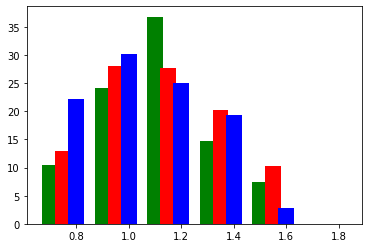

In [84]:
Freq = [10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105, 0.]
Freq2 = [12.90153, 28.11527, 27.66761, 20.21617, 10.34227, 0.]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434, 0.]
barWidth = 0.25

br1 = range(len(Freq))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)

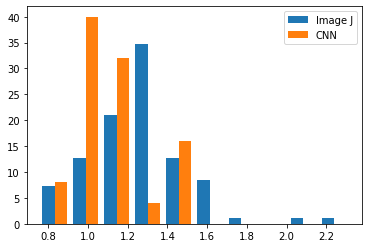

In [85]:
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts)
plt.legend(['Image J','CNN'])

(array([[0.07368421, 0.2       , 0.41052632, 0.75789474, 0.88421053,
         0.96842105, 0.97894737, 0.97894737, 0.98947368, 1.        ],
        [0.08      , 0.48      , 0.8       , 0.84      , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ]]),
 array([0.75356807, 0.90995518, 1.06634229, 1.22272941, 1.37911652,
        1.53550363, 1.69189074, 1.84827785, 2.00466497, 2.16105208,
        2.31743919]),
 <a list of 2 Lists of Patches objects>)

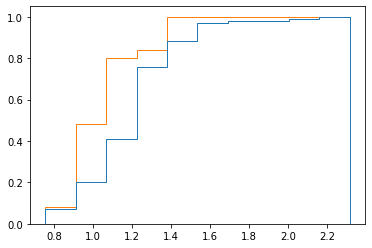

In [86]:
# plt.hist(x, bins=bins, density=True, histtype='step', cumulative=-1,label='Reversed emp.')
plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')

r_squared = 0.7823281961069255


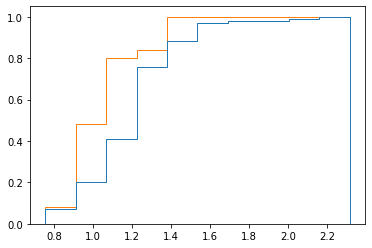

In [87]:
Obj = plt.hist(X, density=True, histtype='step', cumulative=True,label='Reversed emp.')
Y1, Y2 = Obj[0]
Rsquared = r2_score(Y1, Y2)
print('r_squared =',Rsquared)

In [88]:
acc_train = r.history['accuracy'][-1]
acc_test = r.history['val_accuracy'][-1]
loss_train = r.history['loss'][-1]
loss_test = r.history['val_loss'][-1]

In [89]:
df = pd.DataFrame({'N1':N1, 'N2':N2,'R^2':Rsquared,
                   'acc train':acc_train,'acc test':acc_test,
                   'loss train':loss_train,'loss test':loss_test,
                   'Details':Description},
                  index= [0])


In [90]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details
0,20,20,0.782328,1.0,0.965986,0.000042,0.191508,"3 layers of Convolution: 64, 128, 256"


<a list of 2 Lists of Patches objects>
[0.75356807 0.90995518 1.06634229 1.22272941 1.37911652 1.53550363
 1.69189074 1.84827785 2.00466497 2.16105208 2.31743919]
[[ 7.36842105 12.63157895 21.05263158 34.73684211 12.63157895  8.42105263
   1.05263158  0.          1.05263158  1.05263158]
 [ 8.         40.         32.          4.         16.          0.
   0.          0.          0.          0.        ]]


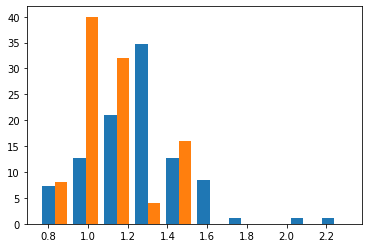

In [91]:
counts, bins, bars = plt.hist(X,weights=wts)
print(bars)
print(bins)
print(counts)

In [92]:
print(counts.sum())

200.0000000000001


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


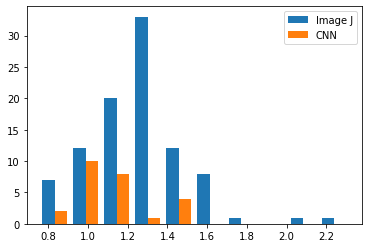

In [93]:

plt.hist([Diam1,Diameter_All])
plt.legend(['Image J','CNN'])


In [94]:
[Diam1,Diameter_All]

[[1.59616801403081,
  1.0217907939900581,
  1.2716187407449044,
  1.104429030701514,
  1.2163487785097904,
  1.6013445735058454,
  1.1715597420637607,
  1.2534662333717612,
  1.2676073151634049,
  1.309600575274104,
  1.292966945531582,
  1.7658322811231006,
  1.3564037533648712,
  1.2407040781688483,
  2.130217298173151,
  1.4228319915327,
  1.0651086490865755,
  1.3008210311003705,
  1.336545951796433,
  0.8927754224911278,
  1.4494292838262302,
  1.4052738287907582,
  1.6421697097891788,
  1.2329833804288621,
  1.19042665178928,
  1.1682948223612457,
  1.1518314137121108,
  0.9607802401865855,
  2.317439190074449,
  1.0591147430338594,
  1.4308630919602832,
  0.7535680705496237,
  0.8608283307581511,
  1.2776122636975893,
  1.3745862957220916,
  1.259546137598783,
  1.2978813187979172,
  1.2412170838050638,
  1.6009469708743893,
  1.3149369953539032,
  1.417901703622935,
  1.2478669653497139,
  1.1055812783082735,
  0.9561307405997607,
  0.9487783503683882,
  1.1238565871041026,
  1

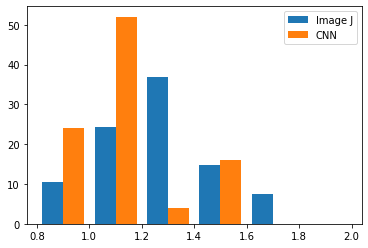

In [95]:
 bins_list = [0.8, 1.0, 1.2, 1.4,1.6, 1.8,2.0]
 wt1 = np.ones(len(Diam1)) / len(Diam1)*100
 wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
 X = pd.DataFrame([Diam1,Diameter_All])
 wts = pd.DataFrame([wt1,wt2])
plt.hist(X,weights=wts,bins = bins_list)
plt.legend(['Image J','CNN'])

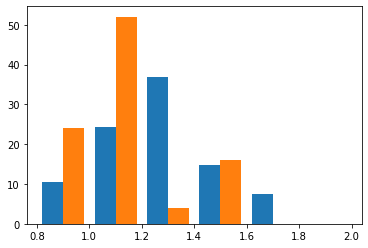

In [96]:
yy = plt.hist(X,weights=wts,bins = bins_list)

In [97]:
yy[0][0]

array([10.52631579, 24.21052632, 36.84210526, 14.73684211,  7.36842105,
        0.        ])

In [98]:
bins_list

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]

In [99]:
k =0
for kk in yy[0][0]:
  name = str(bins_list[k])
  df[name] = yy[0][1][k]
  k = k+1

In [100]:
df

,N1,N2,R^2,acc train,acc test,loss train,loss test,Details,0.8,1.0,1.2,1.4,1.6,1.8
0,20,20,0.782328,1.0,0.965986,0.000042,0.191508,"3 layers of Convolution: 64, 128, 256",24.0,52.0,4.0,16.0,0.0,0.0


In [101]:
Arq = "output.xlsx"
df.to_excel(Arq)
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>